<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/MLalgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %load_ext pycodestyle_magic

import matplotlib.pyplot as plt
import numpy as np

# linear regression
------

mean x , mean y 	 3.0 2.8


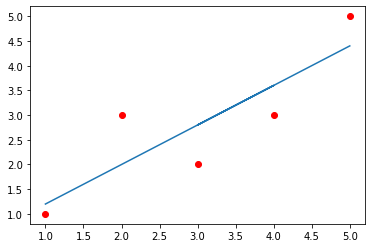

	predicted y:[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
	true y:[1, 3, 3, 2, 5]
+error (mean distance from y ):  0.692820323027551


In [ ]:
xx = [1, 2, 4, 3, 5]
yy = [1, 3, 3, 2, 5]


def meang(data):
    ins_num = len(data)
    ins_sum = sum(data)
    res = ins_sum / ins_num
    return res


meanX = meang(xx)
meanY = meang(yy)
print("mean x , mean y \t", meanX, meanY)
#  y=b0+ b1*x
#  b1=sum((xi-mean) -( yi - mean))/sum ((xi-mean)**2)
def simple_linear_regression(x, y):
    """
    if y depend on one x
    """
    meanX = meang(x)
    meanY = meang(y)
    s0 = []
    s1 = []
    for i in range(len(x)):
        sorat = (x[i] - meanX) * (y[i] - meanY)
        makhraj = (x[i] - meanX) ** 2
        s0.append(sorat)
        s1.append(makhraj)
    b1res = sum(s0) / sum(s1)
    b0res = meanY - (b1res * meanX)
    resy = []
    for i in range(len(x)):
        a = b0res + (b1res * x[i])
        resy.append(a)
    plt.plot(x, resy)
    plt.scatter(x, y, color="r")

    plt.show()
    return resy


yp = simple_linear_regression(xx, yy)
print("\tpredicted y:{}\n\ttrue y:{}".format(yp, yy))


def Rmse(yd, yp):
    n = len(yp)
    b = []
    for i in range(n):
        a = (yp[i] - yd[i]) ** 2
        b.append(a)
    c = sum(b)
    d = np.sqrt(c / n)
    return d


# shortcut for find B1
# b1=np.corrcoef(xx,yy)[1][0]*(np.std(yy)/np.std(xx))

if __name__ == "__main__":
    print("+error (mean distance from y ): ", Rmse(yy, yp))


# Gradient descent 
----------

In [ ]:
# %%pycodestyle
# y=b0+ b1*x
# for 1st of yy and xx
def GD(initweight, index):
    """
    update weights based on input index to minimize error
     initweight :
         initial weight, What weight does it start with?
     index : 
         wich index optimized
    """
    init_weight = initweight
    yyp = init_weight[0] + init_weight[1] * xx[index]
    err = yyp - yy[index]
    for i in range(500):  # range ( iteration )
        # print(init_weight)
        learning_rate = 0.01
        init_weight[0] = init_weight[0] - (err * learning_rate)
        init_weight[1] = init_weight[1] - (
            err * learning_rate * xx[index]
        )  # error naghsh gradian ro dare
        # dar asl bayad moshtagh martabe 1 taabe baashe
        yyp = init_weight[0] + init_weight[1] * xx[index]
        err = yyp - yy[index]

    return init_weight


def predictor(x, y, w):
    resy = []
    for i in range(len(x)):
        yyp = w[0] + w[1] * x[i]
        resy.append(yyp)
    for i, j in zip(y, resy):
        print(f"true y: {i}", f"\tpredicted y: {j}")
    return resy


def present(init_w, xdata, ydata):
    errs = []
    for i in range(len(xdata)):
        wn = GD(init_w, i)
        print(
            "index {} is Picked for gradient descent.".format(i),
            f"Resulting weights: {wn}",
            sep="\t",
        )
        basd = predictor(xdata, ydata, wn)
        err = Rmse(ydata, basd)
        errs.append(err)
        print("\nroot mean squared error (RMSE) : ", err)
        print(" =--------= ")
    print(f"minimum errors is {min(errs)} with index {errs.index(min(errs))+1}")


present([0, 0], xx, yy)


index 0 is Picked for gradient descent.	Resulting weights: [0.49997948800742736, 0.49997948800742736]
true y: 1 	predicted y: 0.9999589760148547
true y: 3 	predicted y: 1.4999384640222821
true y: 3 	predicted y: 2.4998974400371368
true y: 2 	predicted y: 1.9999179520297095
true y: 5 	predicted y: 2.9998769280445643

root mean squared error (RMSE) :  1.1402437891595398
 =--------= 
index 1 is Picked for gradient descent.	Resulting weights: [0.7999917952007886, 1.1000041023941498]
true y: 1 	predicted y: 1.8999958975949385
true y: 3 	predicted y: 2.9999999999890883
true y: 3 	predicted y: 5.2000082047773875
true y: 2 	predicted y: 4.100004102383238
true y: 5 	predicted y: 6.300012307171538

root mean squared error (RMSE) :  1.532976056277425
 =--------= 
index 2 is Picked for gradient descent.	Resulting weights: [0.6705795478609428, 0.5823551130347646]
true y: 1 	predicted y: 1.2529346608957073
true y: 3 	predicted y: 1.835289773930472
true y: 3 	predicted y: 3.0000000000000013
true y: 2

# Logistic regression
---------

pair of true y and predicted y [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] 
accuracy : 	 1.0
predicted weights: [4.997879818997243, 6.569174374317185, -12.90269630756463]


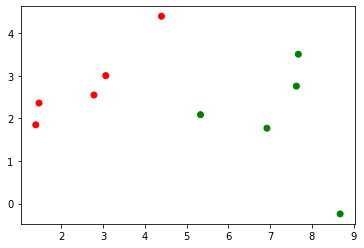

In [ ]:
import random

X = np.array(
    [
        [2.7810836, 2.550537003, 0],
        [1.465489372, 2.362125076, 0],
        [4.396561688, 4.400293529, 0],
        [1.38807019, 1.850220317, 0],
        [3.06407232, 3.005305973, 0],
        [7.627531214, 2.759262235, 1],
        [5.332441248, 2.088626775, 1],
        [6.922596716, 1.77106367, 1],
        [8.675418651, -0.242068655, 1],
        [7.673756466, 3.508563011, 1],
    ]
)
x1, x2, y = X[:, 0], X[:, 1], X[:, 2]
a = np.ones(len(x2))
Xd = np.array(list(zip(x1, x2)))

y = [int(x) for x in y]
colormap = np.array(["r", "g"])
plt.scatter(x1, x2, color=colormap[y])


class LR:
    def __init__(self):
        pass

    def sigmoid(self, w, x):
        res = w[0] + (np.dot(w[1:], x))
        out = 1 / (1 + np.exp(-res))
        return out

    def updater2(self, w, alpha, y, ypred, x):
        wnew = []
        for i in range(len(w)):
            if i == 0:
                w1 = w[i] + alpha * (y - ypred) * ypred * (1 - ypred) * 1
                wnew.append(w1)
            elif i >= 1:
                w1 = (
                    w[i] + alpha * (y - ypred) * x[(i - 1)]
                )  # (y-ypred) * ypred * (1-ypred)* x[(i-1)]
                wnew.append(w1)
        return wnew

    def updater(self, w, alpha, y, ypred, x):
        w1 = w[0] + alpha * (y - ypred) * ypred * (1 - ypred) * 1
        w2 = w[1] + alpha * (y - ypred) * ypred * (1 - ypred) * x[0]
        w3 = w[2] + alpha * (y - ypred) * ypred * (1 - ypred) * x[1]
        wnew = list([w1, w2, w3])
        return wnew

    def doo(self, inw, x, y, ite, lr): # do gradient descent and sigmoid function Continually
        t = 0
        w = inw
        while t < ite:
            random_index = random.randint(0, 9)
            res = self.sigmoid(w, x[random_index])
            w = self.updater2(w, lr, y[random_index], res, x[random_index])
            t += 1
        return w

    def predicter(self, w, x, y):  # for Highlighting accuracy of algorithm
        sto = []
        for i in x:
            a = self.sigmoid(w, i)
            sto.append(a)
        res = []
        for i in sto:
            if i >= 0.5:
                i = 1
                res.append(i)
            elif i < 0.5:
                i = 0
                res.append(i)
        acc = [(i, j) for i, j in zip(y, res)]
        score = 0
        for i, j in acc:
            if i == j:
                score += 1
        print(f'pair of true y and predicted y {acc}', "\naccuracy : \t", score / len(x))
        return res

    def present(self, index, initweight, x, y, iteration, LR):
        inw = initweight
        www = self.doo(initweight, x, y, iteration, LR)
        self.predicter(www, x, y)
        print("weights : ", www)


sg = LR()
inw = [0, 0, 0]
#                                   yp=sg.sigmoid(inw,Xd[4])
#                                sg.updater([0,0,0],0.003,y[0],yp,Xd[0])
www = sg.doo([5, -6, 0], Xd, y, 40000, 2)
#                                             sg.predicter(www,Xd,y)
sg.predicter(www, Xd, y)
print(f'predicted weights: {www}')


# Linear Discriminant Analysis
---------------
calculate mean and variance for each class


Logistic Regression is one of the most popular linear classification models that perform well for binary classification but falls short in the case of multiple classification problems with well-separated classes. While LDA handles these quite efficiently.

LDA can also be used in data preprocessing to reduce the number of features just as PCA(Principal component analysis) which reduces the computing cost significantly.

LDA is also used in face detection algorithms. In Fisherfaces LDA is used to extract useful data from different faces. Coupled with eigenfaces it produces effective results.

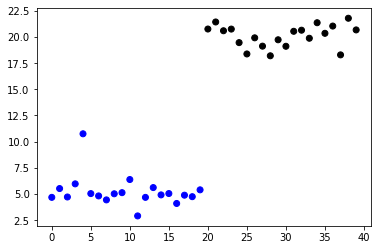

In [ ]:
# Load and feature map of data
data = [
    [4.667797637, 0],
    [5.509198779, 0],
    [4.702791608, 0],
    [5.956706641, 0],
    [10.738622413, 0],
    [5.027283325, 0],
    [4.805434058, 0],
    [4.425689143, 0],
    [5.009368635, 0],
    [5.116718815, 0],
    [6.370917709, 0],
    [2.895041947, 0],
    [4.666842365, 0],
    [5.602154638, 0],
    [4.902797978, 0],
    [5.032652964, 0],
    [4.083972925, 0],
    [4.875524106, 0],
    [4.732801047, 0],
    [5.385993407, 0],
    [20.74393514, 1],
    [21.41752855, 1],
    [20.57924186, 1],
    [20.7386947, 1],
    [19.44605384, 1],
    [18.36360265, 1],
    [19.90363232, 1],
    [19.10870851, 1],
    [18.18787593, 1],
    [19.71767611, 1],
    [19.09629027, 1],
    [20.52741312, 1],
    [20.63205608, 1],
    [19.86218119, 1],
    [21.34670569, 1],
    [20.333906, 1],
    [21.02714855, 1],
    [18.27536089, 1],
    [21.77371156, 1],
    [20.65953546, 1],
]
data = np.array(data)
xdata = data[:, 0]
ydata = data[:, 1]
y = [int(i) for i in ydata]
colormap = np.array(["b", "k"])
plt.scatter(range(len(xdata)), xdata, color=colormap[y])
plt.show()
class1 = []
class2 = []
# seperating each class into c1 and c2
for i in range(len(xdata)):
    if ydata[i] == 0:
        class1.append(xdata[i])
    elif ydata[i] == 1:
        class2.append(xdata[i])
c1, c2 = np.array(class1), np.array(class2)
meanC1, meanC2 = np.mean(c1), np.mean(c2)
classprobability = [
    y.count(1) / len(y),
    y.count(0) / len(y),
]  # in each class how many data present


In [ ]:
def SquaredDifference(data):
    mean = sum(data) / len(data)
    a = [(i - mean) ** 2 for i in data]
    a = sum(a)
    return a


def variance(SD, Nclass, Ninstance):
    return 1 / (Ninstance - Nclass) * SD


SDC1, SDC2 = SquaredDifference(c1), SquaredDifference(c2)
SDT = SDC1 + SDC2
var = variance(SDT, 2, len(xdata))
# ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
import math


def LdA(x, mean, var, classProbability):
    a = x * (mean / var) - ((mean) ** 2 / (var * 2)) + math.log(classProbability)
    return a


def predict(x, mean, var, classProbability):
    sto = []
    for i in xdata:

        a = LdA(i, meanC1, var, classprobability[0])
        b = LdA(i, meanC2, var, classprobability[1])
        sto.append([a, b])
    res = []
    for i, j in sto:
        a = 0 if i > j else 1
        res.append(a)
    return res


yp = predict(i, meanC1, var, classprobability[0])


def acc(Ty, Py):
    ss = 0
    A = []
    for i in range(len(Ty)):
        A.append([Ty[i], Py[i]])
        if Ty[i] == Py[i]:
            ss += 1
    print(f"pair of True y and Predicte y {A}", "\nacc", ss / len(y))


acc(y, yp)


pair of True y and Predicte y [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]] 
acc 1.0


# `NonLinear algorithms`
 nonparametric
 

# CART 
---------

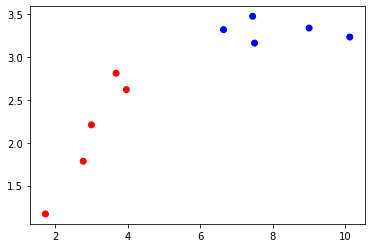

In [ ]:
data = [
    [2.771244718, 1.784783929, 0],
    [1.728571309, 1.169761413, 0],
    [3.678319846, 2.81281357, 0],
    [3.961043357, 2.61995032, 0],
    [2.999208922, 2.209014212, 0],
    [7.497545867, 3.162953546, 1],
    [9.00220326, 3.339047188, 1],
    [7.444542326, 3.476683375, 1],
    [10.12493903, 3.234550982, 1],
    [6.642287351, 3.319983761, 1],
]
data = np.array(data)
xdata = data[:, :2]
ydata = data[:, 2]
ydata = [int(i) for i in ydata]
colormap = np.array(["r", "b"])
plt.scatter(xdata[:, 0], xdata[:, 1], color=colormap[ydata])


In [ ]:
def spliter(data, sp, y):
    navi = {"left": [], "right": []}
    for i in range(len(data)):
        if data[i] >= sp:
            navi["right"].append(y[i])
        elif data[i] < sp:
            navi["left"].append(y[i])
    if len(navi["left"]) != 0 and len(navi["right"]) != 0:
        left_class1 = navi["left"].count(1) / len(navi["left"])
        left_class2 = 1 - left_class1
        right_class1 = navi["right"].count(1) / len(navi["right"])
        right_class2 = 1 - right_class1
        gini = (
            left_class1 * (1 - left_class1)
            + right_class1 * (1 - right_class1)
            + left_class2 * (1 - left_class2)
            + right_class2 * (1 - right_class2)
        )
        print("gini value {}".format(gini), navi, sep="\n")
    else:
        print("\tgini = 1 ")
    return navi


for i in range(len(xdata)):
    print("epoch", i)
    spliter(xdata[:, 0], i, ydata)


epoch 0
	gini = 1 
epoch 1
	gini = 1 
epoch 2
gini value 0.49382716049382713
{'left': [0], 'right': [0, 0, 0, 0, 1, 1, 1, 1, 1]}
epoch 3
gini value 0.40816326530612246
{'left': [0, 0, 0], 'right': [0, 0, 1, 1, 1, 1, 1]}
epoch 4
gini value 0.0
{'left': [0, 0, 0, 0, 0], 'right': [1, 1, 1, 1, 1]}
epoch 5
gini value 0.0
{'left': [0, 0, 0, 0, 0], 'right': [1, 1, 1, 1, 1]}
epoch 6
gini value 0.0
{'left': [0, 0, 0, 0, 0], 'right': [1, 1, 1, 1, 1]}
epoch 7
gini value 0.2777777777777778
{'left': [0, 0, 0, 0, 0, 1], 'right': [1, 1, 1, 1]}
epoch 8
gini value 0.46875
{'left': [0, 0, 0, 0, 0, 1, 1, 1], 'right': [1, 1]}
epoch 9
gini value 0.46875
{'left': [0, 0, 0, 0, 0, 1, 1, 1], 'right': [1, 1]}


# Naive bayes
----

In [ ]:
with open("naive.txt") as file:
    readed_data = file.read().strip().split("\n")
    readed = [i.split(" ") for i in readed_data]
del readed[0]
b = np.array(readed)
print(" our data : ", b, end="\n----------\n")
sto = []
for i in range(len(b)):
    for j in range(len(b[0])):
        if b[i][j] == "sunny" or b[i][j] == "working" or b[i][j] == "go-out":
            a = 1
            sto.append(a)
        elif b[i][j] == "rainy" or b[i][j] == "broken" or b[i][j] == "stay-home":
            a = 0
            sto.append(a)
sto = np.reshape(sto, (10, 3))
weather = sto[:, 0]
car = sto[:, 1]
ydata = sto[:, 2]
#  naive Bayes
# - - - - - - - - -
class NB:
    def __init__(self, classes, data1, data2):
        self.classes = classes
        self.data1 = data1
        self.data2 = data2

    def be_shart(self, dataa, term1, term2):
        """
        dataa :
            car or weather
        term 1:
            for dataa 0 broken or rainy 
        term 2:
            for y classes 0 stayHome 1 goOut
        
        """
        class_probability = list(self.classes).count(term2) / len(self.classes)
        sto1 = []
        for i in range(len(self.classes)):
            if dataa[i] == term1 and self.classes[i] == term2:
                sto1.append(i)
            # print(self.data1[i],self.data2[i],self.classes[i])
        res1 = len(sto1) / (len(self.classes) * class_probability)
        return res1

    def predict(self, att1, att2, cp):
        a1 = (
            self.be_shart(self.data1, att1, 0) * self.be_shart(self.data2, att2, 0) * cp
        )
        a2 = (
            self.be_shart(self.data1, att1, 1) * self.be_shart(self.data2, att2, 1) * cp
        )
        # print('stay home: {} , go out: {}'.format(a1,a2))
        res = "stay home" if a1 > a2 else "go out"
        return res


# be_shart(car,ydata,1,0)\
sg = NB(ydata, car, weather)
print(" o o o o o ", sg.be_shart(car, 0, 0))
sg.predict(1, 1, 0.5)
print("index  ,  ypredict  , yorg")
for i in range(len(car)):
    c = "--stay home" if ydata[i] == 0 else "--go out"
    print(i, sg.predict(car[i], weather[i], 0.5), c, sep=" , ")


 our data :  [['sunny' 'working' 'go-out']
 ['rainy' 'broken' 'go-out']
 ['sunny' 'working' 'go-out']
 ['sunny' 'working' 'go-out']
 ['sunny' 'working' 'go-out']
 ['rainy' 'broken' 'stay-home']
 ['rainy' 'broken' 'stay-home']
 ['sunny' 'working' 'stay-home']
 ['sunny' 'broken' 'stay-home']
 ['rainy' 'broken' 'stay-home']]
----------
 o o o o o  0.8
index  ,  ypredict  , yorg
0 , go out , --go out
1 , stay home , --go out
2 , go out , --go out
3 , go out , --go out
4 , go out , --go out
5 , stay home , --stay home
6 , stay home , --stay home
7 , go out , --stay home
8 , stay home , --stay home
9 , stay home , --stay home


--------
# dataaaaas
gaussian naive bayes
-------
probability density function -> pdf
 

In [ ]:
with open("naive G.txt") as file:
    readed = file.read().strip().split("\n")
    readed = [i.split(" ") for i in readed]
del readed[0]
readed = np.array(readed)
xx = []
for i in readed:
    x = [float(j) for j in i]
    xx.append(x)
xx = np.array(xx)
xdata = xx[:, :2]
ydata = xx[:, 2]
ydata = [int(i) for i in ydata]
colormap = np.array(["r", "b", "k"])
plt.scatter(xdata[:, 0], xdata[:, 1], color=colormap[ydata])


FileNotFoundError: ignored

Text(0, 0.3989422804014327, '(0,0.3989422804014327)')

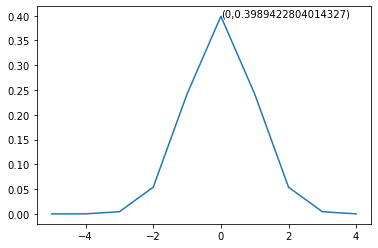

In [ ]:
sd=1
mean=0
def pdf(X,mean,sd):
    aa=np.exp(-((X-mean)**2)/(2*(sd**2)))
    a=1/(np.sqrt(2*np.pi)*sd)
    return a*aa
y=[pdf(i,mean,sd) for i in range(-5,5)]
maxindex=y.index(max(y))
x1=range(-5,5)
plt.plot(x1,y)
plt.text(x1[maxindex],y[maxindex],'({},{})'.format(x1[maxindex],y[maxindex]))


In [ ]:
m0=np.mean(xx[:5,0])
s=np.std(xx[:5,1])
# get mean and std to calculate conditional property from each class 

In [ ]:
pdf(xx[:,1][0],m0,s)
# calculate probabiltity of each X
# calculate p(0) and p(1) with bayes theorom
# p(0) = p((X1) | y=0) * p(pdf(X2) | y=0) * CP

0.36960849581557953

# K NEAREST NEIGHBOR

a=(xdata[0][0]-xdata[1][0])**2 
<br>
b=(xdata[0][1]-xdata[1][1])**2 <br>
np.sqrt(a+b)

In [ ]:
from collections import Counter


def squared_diff2(data1, data2):
    a = (data1[0] - data2[0]) ** 2 + (data1[1] - data2[1]) ** 2
    return np.sqrt(a)


def knn(k, x, y, newx):
    a = [squared_diff2(xdata[i], newx) for i in range(len(x))]
    neighbors = {"distances": [], "class": [], "index": []}
    b = sorted(a)
    for i in range(k):
        c = b[i]
        neighbors["index"].append(a.index(c))
        neighbors["distances"].append(c)
        neighbors["class"].append(y[a.index(c)])
    print("Guessed class: ", max(Counter(neighbors["class"])))
    return neighbors


print("distance beetwen two input data", squared_diff2(xdata[1], xdata[4]))
Xnew = [7.093607318, 4.365731514]
Ynew = 1
knn(3, xdata, ydata, Xnew)


IndexError: ignored

----------
# learning vector quantizaton 
-------------

In [ ]:
codeBook = np.array([[10, 10, 1], [0, 0, 0.0]])
p = print
b = []
LR = 0.1
epoch = 0
Mepoch = 500
while epoch < Mepoch:
    for j in range(len(xx)):
        a = [squared_diff2(xx[j], codeBook[i]) for i in range(len(codeBook))]
        c = a.index(min(a))
        d = codeBook[c][2]
        e = xx[j][2]
        # p(e,d, e == d , codeBook[c])
        for k in range(len(codeBook[0]) - 1):
            if e == d:
                codeBook[c][k] = codeBook[c][k] + (LR * (xx[j][k] - codeBook[c][k]))
            elif e != d:
                codeBook[c][k] = codeBook[c][k] - (LR * (xx[j][k] - codeBook[c][k]))
    epoch += 1
p(codeBook)

xnew = [3, 4]
knn(1, xdata, ydata, xnew)


[[7.67782042 2.82410108 1.        ]
 [2.70729724 3.08537391 0.        ]]
Guessed class:  0


{'distances': [0.8946231691662638], 'class': [0], 'index': [3]}

# support vector machine
SVM

# **kmeans**


# ensemble algorithms

```
bagging 
boosting
stacking
```


